In [2]:
from audioLIME.data_provider import RawAudioProvider
from sota_utils import prepare_config, get_predict_fn

'Angry' => 0
'Happy' => 1
'Sad' => 2
'Neutral' => 3

Elegimos el modelo a analizar

In [3]:
# Elegimos modelo que vamos a querer analizar
wav_path="/home/cbolanos/explain_where/output/real_ang_Ses02F_script01_1_M013.wav"
emo="ang"
model_path = "/home/cbolanos/experiments/iemocap_whisper/fold_2/save/CKPT+2024-10-04+15-23-48+00/model.ckpt"
data_provider = RawAudioProvider(wav_path)
wav, feat_len = data_provider.get_mix()
config = prepare_config(num_classes=4, hidden_size=256, model_path=model_path, feat_len=feat_len)
predict_fn = get_predict_fn(config)

In [6]:
import numpy as np


log_probs = predict_fn([wav])
predicted_class = np.argmax(log_probs)

samples_to_mask = int((500 / 1000) * 16000)
masked_audio = np.copy(wav)
masked_audio[:samples_to_mask] = 0
masked_audio[-samples_to_mask:] = 0

print(f'predicted: {log_probs}')

log_probs1 = predict_fn([masked_audio])
predicted_class1 = np.argmax(log_probs1)
print(f'predicted: {log_probs1}')


Logits shape: torch.Size([1, 4])
predicted: [[-0.49115914 -1.4646333  -2.7908995  -2.3480585 ]]
Logits shape: torch.Size([1, 4])
predicted: [[-0.3949269 -1.5767733 -2.9995751 -2.66181  ]]


In [15]:
 int(16000 * (500 / 1000))

8000

In [16]:
log_probs = predict_fn([wav])
predicted_class = np.argmax(log_probs)

samples_to_mask = int((1700 / 1000) * 16000)
masked_audio = np.copy(wav)
masked_audio[samples_to_mask:samples_to_mask+8000] = 0

print(f'predicted: {log_probs}')

log_probs1 = predict_fn([masked_audio])
predicted_class1 = np.argmax(log_probs1)
print(f'predicted: {log_probs1}')


Logits shape: torch.Size([1, 4])
predicted: [[-0.49115914 -1.4646333  -2.7908995  -2.3480585 ]]
Logits shape: torch.Size([1, 4])
predicted: [[-0.65610296 -1.2897446  -2.4043162  -2.1588118 ]]


In [19]:
df[df.columns[0]]


0     -0.470187
1     -0.706416
2     -0.510568
3     -0.580688
4     -0.677572
         ...   
556   -1.008430
557   -0.940102
558   -0.710908
559   -0.758224
560   -0.636465
Name: -0.4911587, Length: 561, dtype: float64

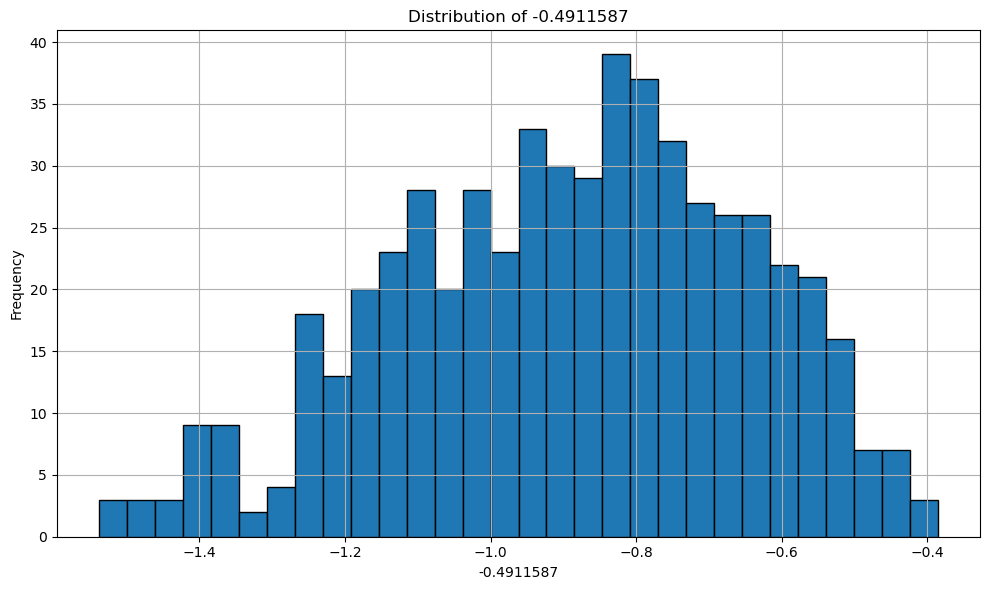

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = '/home/cbolanos/experiments/emotion/Ses02F_script01_1_M013.wav/labels.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Get the name of the first column
first_column = df.columns[0]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution
df[first_column].hist(bins=30, edgecolor='black')

# Add labels and title
plt.xlabel(first_column)
plt.ylabel('Frequency')
plt.title(f'Distribution of {first_column}')

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Save the plot
# plt.savefig('distribution_plot.png')

In [3]:
import numpy as np
from utils import mask_audio
import numpy as np

log_probs = predict_fn([wav])
predicted_class = np.argmax(log_probs)

results_500_30, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=500, shift_interval_ms=40, mask_value=0, predict_fn=predict_fn)
results_500_50, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=500, shift_interval_ms=50, mask_value=0, predict_fn=predict_fn)
results_500_70, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=500, shift_interval_ms=60, mask_value=0, predict_fn=predict_fn)


Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits sha

In [4]:
min_size = min(np.array(results_500_30).shape[0], np.array(results_500_50).shape[0], np.array(results_500_70).shape[0])

# Truncate all arrays to the minimum size along the first dimension
array_30 = np.array(results_500_30)[:min_size, :, :]
array_50 = np.array(results_500_50)[:min_size, :, :]
array_70 = np.array(results_500_70)[:min_size, :, :]

# Now you can add them
results_500 = (array_30 + array_50 + array_70) / 3


In [5]:
results_1000_30, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=1000, shift_interval_ms=40, mask_value=0, predict_fn=predict_fn)
results_1000_50, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=1000, shift_interval_ms=50, mask_value=0, predict_fn=predict_fn)
results_1000_70, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=1000, shift_interval_ms=60, mask_value=0, predict_fn=predict_fn)

Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits sha

In [6]:
min_size = min(np.array(results_1000_30).shape[0], np.array(results_1000_50).shape[0], np.array(results_1000_70).shape[0])

# Truncate all arrays to the minimum size along the first dimension
array_30 = np.array(results_1000_30)[:min_size, :, :]
array_50 = np.array(results_1000_50)[:min_size, :, :]
array_70 = np.array(results_1000_70)[:min_size, :, :]

# Now you can add them
results_1000 = (array_30 + array_50 + array_70) / 3


In [7]:
results_2000_30, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=2000, shift_interval_ms=40, mask_value=0, predict_fn=predict_fn)
results_2000_50, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=2000, shift_interval_ms=50, mask_value=0, predict_fn=predict_fn)
results_2000_70, audios_mask_500 = mask_audio(wav, sample_rate=16000, mask_duration_ms=2000, shift_interval_ms=60, mask_value=0, predict_fn=predict_fn)

Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits shape: torch.Size([1, 4])
Logits sha

In [8]:
min_size = min(np.array(results_2000_30).shape[0], np.array(results_2000_50).shape[0], np.array(results_2000_70).shape[0])

# Truncate all arrays to the minimum size along the first dimension
array_30 = np.array(results_2000_30)[:min_size, :, :]
array_50 = np.array(results_2000_50)[:min_size, :, :]
array_70 = np.array(results_2000_70)[:min_size, :, :]

# Now you can add them
results_2000 = (array_30 + array_50 + array_70) / 3

In [9]:
from utils import create_combined_video

create_combined_video(wav_path, "/home/cbolanos/explain_where/output/Ses02F_script01_1_M013.wav_stats.json", results_500, results_1000, results_2000, log_probs, predicted_class, emo)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Combined animation with audio saved as combined_animation_with_audio.mp4


frame=  152 fps=0.0 q=-1.0 Lsize=     453kB time=00:00:05.12 bitrate= 725.0kbits/s speed=  15x    
video:406kB audio:43kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.888685%
[aac @ 0x55c9463e6b00] Qavg: 133.160
[libx264 @ 0x55c9463e8240] frame I:1     Avg QP:19.77  size:165938
[libx264 @ 0x55c9463e8240] frame P:67    Avg QP:23.33  size:  3257
[libx264 @ 0x55c9463e8240] frame B:84    Avg QP:25.41  size:   364
[libx264 @ 0x55c9463e8240] consecutive B-frames:  9.9% 28.9% 61.2%  0.0%
[libx264 @ 0x55c9463e8240] mb I  I16..4: 17.3% 61.3% 21.4%
[libx264 @ 0x55c9463e8240] mb P  I16..4:  0.6%  0.1%  0.1%  P16..4:  5.7%  0.4%  0.5%  0.0%  0.0%    skip:92.7%
[libx264 @ 0x55c9463e8240] mb B  I16..4:  0.2%  0.0%  0.0%  B16..8:  4.3%  0.0%  0.0%  direct: 0.2%  skip:95.2%  L0:27.4% L1:72.5% BI: 0.1%
[libx264 @ 0x55c9463e8240] 8x8 transform intra:42.1% inter:65.9%
[libx264 @ 0x55c9463e8240] coded y,uvDC,uvAC intra: 31.7% 33.3% 30.6% inter: 1.0% 2.1% 1.1%
[libx264 @ 0x55c9463e8